# Simulation und Modellierung WS17/18 - Uebung 06

### Aufgabe 1: Erzeugung und Multiplikation von Vektoren und Matrizen

Die Ableitung einer Funktion $f(x)$ an einer Stelle $x_0$ kann mit Hilfe eines geeigneten Differenzenquotienten approximiert werden. Es gilt

$$
    \lim_{h\to 0} \frac{f(x_0+h)-f(x_0-h)}{2h} = f'(x_0)
$$

- Definieren Sie eine `N`x`N` Matrix `D`, welche auf einen `N`x`1` Vektor `f` angewendet die symmetrische Differenz der Gitterpunkte $(Df)_i = f_{i+1}-f_{i-1}$ berechnet, wobei man periodische Randbedingungen $f_{i+N}=f_i$ annimmt. 
- berechnen Sie mit Hilfe dieser Matrix die erste und zweite Abbleitung der Funktion `f(x) = sin(x)` welche an `N` Gitterpunkten auf dem Intervall $[0,2\pi)$ gegeben sei.
- plotten Sie $f(x)$, $f'(x)$ und $f''(x)$ in ein Diagramm.

In [2]:
#Ausgabe der Plots im Notebook und laden von numpy und pylab (matplotlib+pyplot)
%matplotlib inline
import numpy as np 
from pylab import *

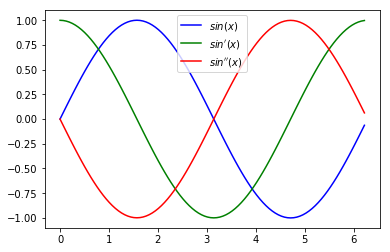

In [4]:
#define N, D, x, h, f, df  and d2f here

N = 100      #Anzahl der Gitterpunkte
h = 2*pi/N

D = np.eye (N,k=+1) - np.eye (N,k=-1)  #ersteklt die Matrix
D[0,N-1] = -1 #mit periodischen Randbedingungen
D[N-1,0] = 1
D = D/(2*h)  #und teilt sie ,durch Differenzenquotient vorgegeben, durch 2h

x = linspace(0,2*pi,N,endpoint = False) #Definitionswerte der Funktion
f = sin(x)   #Funktionswerte der FUnktion

df = D.dot(f)  #Bestimmung der Funktionswerte für erste Ableitung
d2f = D.dot(df)  #und für zweite Ableitung


plot(x,f,'b',label='$sin(x)$')
plot(x,df,'g',label='$sin\'(x)$')
plot(x,d2f,'r',label="$sin''(x)$")
legend()
show()

### Aufgabe 2 : Der getriebene, gedaempfte harm. Oszillator

Der getriebene, gedaempfte harmonische Oszillator genuegt der Differentialgleichung

$$
    \ddot x + 2\gamma \dot x + \omega_0^2 x = A \cos(t)
$$
z.B. mit $\gamma=0.1$, $\omega_0=1.0$ und $A=1.0$.
- Schreiben Sie eine Funktion `limit_cycle(omega0=1.0,gamma=0.1,A=1.0,N=100)`, welche die lineare, inhomogene Differentialgleichung in `N` Zeitschritte ueber eine Periode der antreibenen Kraft diskretisiert und als lineares Gleichungssystem 
<br><br>
$$
    \frac{1}{4h^2}\textrm{D}^2\cdot \vec{x} + 2\gamma \frac{1}{2h}\textrm{D}\cdot \vec{x} + \omega_0^2 ~\mathbf{1}\cdot \vec{x} = A cos(\vec{t})
$$
loest. 

- Bestimmen und zeichnen Sie die Amplitude $B$ und die Phasenverschiebung $\varphi$ der Loesung $x = B \cos(t-\varphi)$ als Funktion von $\omega_0$. Hierfuer kann man die numpy Array Methode `x.argmax()` verwenden, welche den Index des maximalen Elements von `x` liefert.
- Zeichnen Sie die analytischen Loesungen
$$
\begin{eqnarray}
    B &=& \frac{A}{\sqrt{(\omega_0^2-1)^2+4\gamma^2}} \\
    \tan\varphi &=& \frac{-2\gamma}{\omega_0^2-1}
\end{eqnarray}
$$
ueber die von Ihnen numerisch gefundenen Loesungen als Funktion der Eigenfrequenz $\omega_0$ des harmonischen Oscillators. *Hinweis :* Die Methode `numpy.arctan2(y,x)` gibt den Winkel `alpha` mit `sin(alpha)=y` und `cos(alpha)=x` zurueck.

In [36]:
import numpy as np
def limit_cycle(omega0=1.0,gamma=0.1,A=1.0,N=100) :
    """ 
    Bestimmt die Loesung der inhomogenen linearen Differentialgleichung
    d^2x/dt^2 + 2 gamma dx/dt + omega0^2 x = A cos(t)
    auf dem in N Punkte diskretisierten periodischen Zeitintervall [0,2pi)
    """
    
    #your code goes here
    
    t = linspace(0,2*pi,N,endpoint=False) #Vektor mit N Werten im Intervall
    
    h = (2*pi)/N
    
    D = np.eye (N,k=1) - np.eye (N,k=-1) #Ableitungsmatrix aus Aufgabe 1
    D[0,N-1] = -1
    D[N-1,0] = 1
    
    
    x = np.linalg.solve( (D.dot(D)*(1/4*h**2))+D*(2*gamma*1/(2*h))+omega0**2*np.eye(N),A*cos(t) )
    #Formel
    return (x)

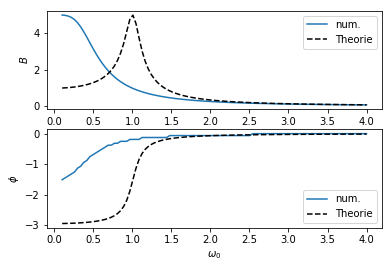

In [37]:
L=100
omega0 = np.linspace(0.1,4,L)
B = np.zeros(L)
phi = np.zeros(L)

# bestimme B und phi numerisch fuer alle Werte in omega0
# definiere die theoretischen Werte Bth und phith

for n in range(0,L): #Annäherungsfunktion an Amplitude + Phasenverschiebung
    x = limit_cycle(omega0 = omega0[n],N=L)
    B[n]=x[x.argmax()]  #Bestimmung des größten Indexes
    phi[n]=-x.argmax()*(2*pi/L)
    
A=1.0    #Randbedinungen für Nullvektoren für Amplitude und Phasenverschwiebung
gamma=0.1
Bth=np.zeros(L)
phith=np.zeros(L)

for n in range (0,L):
    Bth[n]=A/(sqrt((omega0[n]**2-1)**2+4*gamma**2)) #Funktion Amplitude
    phith[n]=np.arctan2(-2*gamma,omega0[n]**2-1) #FUnktion Phasenverschiebung
    
    
subplot(2,1,1)
plot(omega0,B,label='num.')
plot(omega0,Bth,'k--',label='Theorie')
legend()
xlabel('$\omega_0$')
ylabel('$B$')


subplot(2,1,2)
plot(omega0,phi,label='num.')
plot(omega0,phith,'k--',label='Theorie')
legend()
xlabel('$\omega_0$')
ylabel('$\phi$')
show()